# IMDB 리뷰 감성 분류하기

## 1. IMDB 리뷰 데이터에 대한 이해

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb

In [7]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# imdb.data_load()의 파라미터로 num_words를 사용하면 
# 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를 사용할 것인지를 의미한다.
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [8]:
# 훈련 데이터가 어떻게 구성되어있는지 확인해보기 위해 첫번째 훈련용 리뷰 출력
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있다. 이 데이터는 **토큰화와 정수 인코딩이라는 텍스트 전처리**가 끝난 상태이다.   
IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라 인덱스를 부여했다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높다.   

</br>
y_train[0]의 값은 1이다. 이 예제의 경우 감성 값으로서 0 또는 1의 값을 가지는데, 이 경우에는 긍정을 의미하는 1의 값을 갖는다.

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


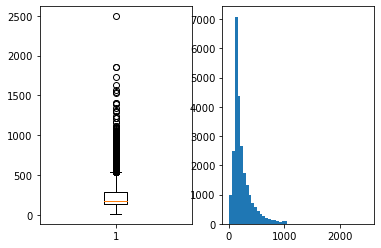

In [9]:
# 25000개의 훈련용 리뷰의 길이 분포를 그래프로 시각화해보기
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [10]:
# 레이블의 분호 확인하기
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [13]:
# X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인
# 주의할 점 : IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별한 토큰으로 취급하고 있다.
# 따라서 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수이다.
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value + 3] = key

print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))
print('빈도수 상위 1000등 단어 : {}'.format(index_to_word[1001]))

빈도수 상위 1등 단어 : the
빈도수 상위 1000등 단어 : co


In [12]:
# 첫번째 훈련용 리뷰의 X_train[0]이 원래 어떤 단어들이였는지 확인
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

## 2. GRU로 IMDB 리뷰 감성 분류하기

In [5]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [8]:
# 이번엔 집합의 크기를 10,000으로 제한
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

# 각 리뷰는 문장의 길이가 다르기 때문에, 모델이 처리할 수 있도록 길이를 동일하게 해주어야 한다.
# pad_sequences()를 사용하면 max_len에 넣는 값으로 길이가 고정된다.
# 길이가 초과하면 초과분을 삭제하고, 부족하면 0으로 채운다.
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\pc\.conda\envs\sentiment_analysis\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\pc\.conda\envs\sentiment_analysis\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [15]:
model = Sequential()
# Embedding(단어 집합의 크기, 임베딩 후의 벡터 크기)
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
# 이진 분류이므로 출력층은 뉴런 하나와 활성화 함수로 시그모이드 함수 사용
model.add(Dense(1, activation='sigmoid'))

# 검증 데이터의 loss가 증가하면, 과적합의 징후이므로
# 검증 데이터 loss이 4회 증가하면 학습을 중단하는 EarlyStopping 사용
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

# 검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장하도록 ModelCheckpoint 사용
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# 긍정인지 부정인지에 대한 잊니 판별값이 출력이 되기 때문에, 손실함수는 binary_crossentropy 사용
# 최적화 함수는 rmsprop 사용
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
334/334 [==============================] - ETA: 0s - loss: 0.4951 - acc: 0.7658
Epoch 00001: val_acc improved from -inf to 0.85900, saving model to GRU_model.h5
334/334 [==============================] - 159s 476ms/step - loss: 0.4951 - acc: 0.7658 - val_loss: 0.3261 - val_acc: 0.8590
Epoch 2/15
334/334 [==============================] - ETA: 0s - loss: 0.3238 - acc: 0.8721
Epoch 00002: val_acc improved from 0.85900 to 0.88440, saving model to GRU_model.h5
334/334 [==============================] - 163s 488ms/step - loss: 0.3238 - acc: 0.8721 - val_loss: 0.2935 - val_acc: 0.8844
Epoch 3/15
334/334 [==============================] - ETA: 0s - loss: 0.2658 - acc: 0.9016
Epoch 00003: val_acc did not improve from 0.88440
334/334 [==============================] - 189s 565ms/step - loss: 0.2658 - acc: 0.9016 - val_loss: 0.3794 - val_acc: 0.8462
Epoch 4/15
334/334 [==============================] - ETA: 0s - loss: 0.2025 - acc: 0.9255
Epoch 00004: val_acc improved from 0.88440 to 

In [9]:
# 테스트 데이터에 대해서 정확도를 평가
# 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5' 로드
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 74s 94ms/step - loss: 0.3302 - acc: 0.8877

 테스트 정확도: 0.8877


In [10]:
# 임의의 문장에 대해서 리뷰의 긍정, 부정 예측하는 함수
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

  # 정수 인코딩
  encoded = []
  for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한.
    try :
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
    # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 취급.
    except KeyError:
      encoded.append(2)

  pad_new = pad_sequences([encoded], maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [18]:
temp_str = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(temp_str)

98.91% 확률로 부정 리뷰입니다.


In [19]:
temp_str = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(temp_str)

99.46% 확률로 긍정 리뷰입니다.


In [20]:
temp_str = "so bad"

sentiment_predict(temp_str)

88.64% 확률로 부정 리뷰입니다.


In [21]:
temp_str = "so good"

sentiment_predict(temp_str)

89.20% 확률로 긍정 리뷰입니다.


In [22]:
temp_str = "There are a lot of c young people who are agitated and watch a drama divided into good and evil."

sentiment_predict(temp_str)

67.02% 확률로 긍정 리뷰입니다.


In [23]:
temp_str = "Bring in the vaccine properly. What are you doing?"

sentiment_predict(temp_str)

57.41% 확률로 긍정 리뷰입니다.


In [14]:
temp_str = "You will come after a good night's sleep"

sentiment_predict(temp_str)

70.97% 확률로 긍정 리뷰입니다.
